In [1]:
data = read.table("configs/data/atac_versus_dnase_profile_compare_nov_2024.tsv", sep=",",header=FALSE)

In [2]:
data

V1,V2,V3
<chr>,<chr>,<dbl>
ATF2,ATAC,0.0180392938
ATF2/ATF3,ATAC,0.0087161467
CTCF,ATAC,0.2707648680
CTCFL,ATAC,0.0034333461
ELK1,ATAC,0.0278745975
GATA1/TAL1,ATAC,0.1275981278
GC,ATAC,0.0474313924
NFE2/NFE2L1,ATAC,0.0248348532
NFE2L1/MAF,ATAC,0.0701370019


In [3]:
new_data = data[data["V2"]=="ATAC",]

In [4]:
new_data = aggregate(V3 ~ V1, new_data, sum)    
new_data

V1,V3
<chr>,<dbl>
ATF2,0.0180392938
ATF2/ATF3,0.0087161467
CTCF,0.2707648680
CTCFL,0.0034333461
ELK1,0.0278745975
GATA1/TAL1,0.1275981278
GC,0.0474313924
NFE2/NFE2L1,0.0248348532
NFE2L1/MAF,0.0701370019


In [5]:
new_data[order(new_data$V3, decreasing=TRUE),"V1"]

[1] "CTCF"        "SP1"         "GATA1/TAL1"  "NFE2L1/MAF"  "NFYA"       
 [6] "GC"          "ELK1"        "NFE2/NFE2L1" "ATF2"        "ZNF143"     
[11] "NFIC"        "NRF1"        "TFE3"        "YY1"         "ATF2/ATF3"  
[16] "ZBTB33"      "REST"        "CTCFL"       "RFX1"        "STAT5A"     
[21] "TAL1"

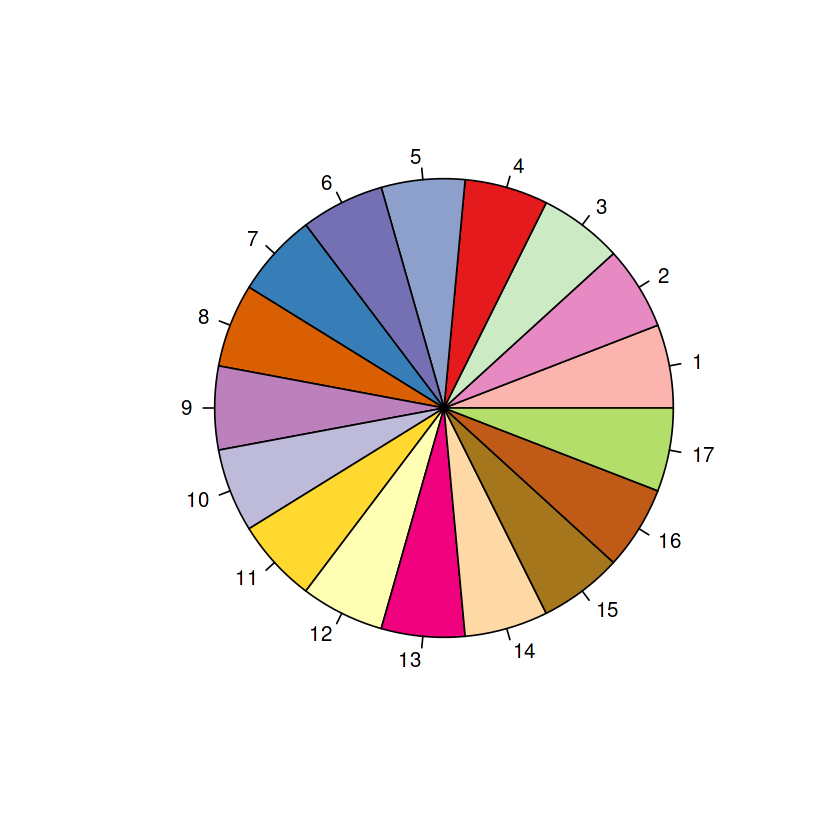

In [6]:
library(RColorBrewer)
n <- 17
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))
pie(rep(1,n), col=sample(col_vector, n))

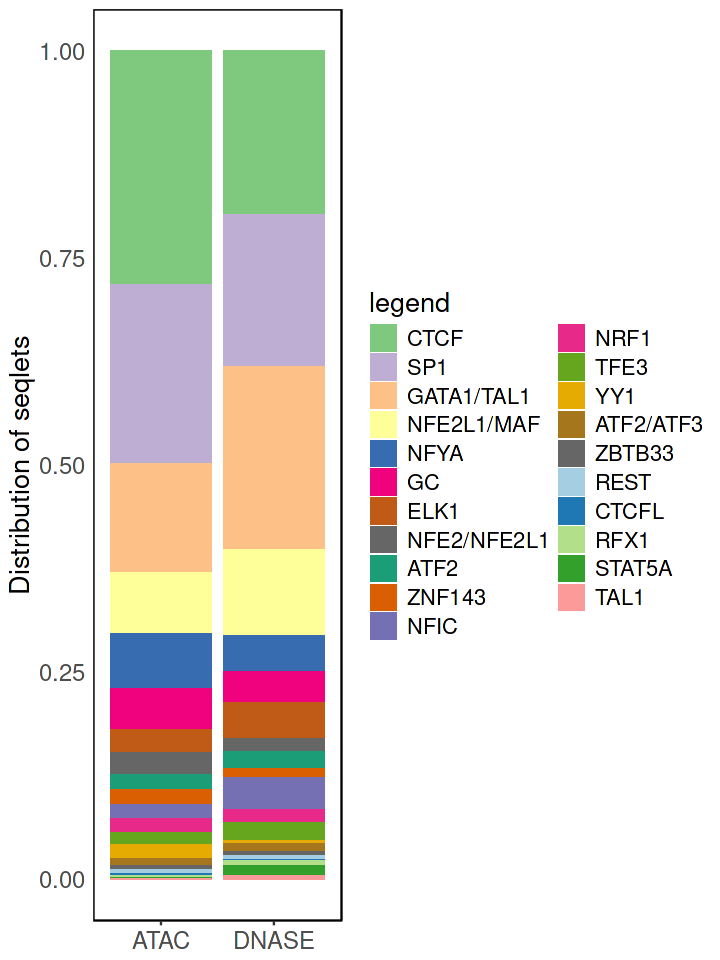

In [11]:
library(ggplot2)
#data
options(repr.plot.width = 6, repr.plot.height = 8)

ggplot(data, aes(x=V2, y=V3, fill=factor(V1, levels=new_data[order(new_data$V3, decreasing=TRUE),"V1"]))) +
geom_bar(position='fill', stat='identity') +
theme_classic() +
theme(plot.title = element_text(hjust = 0.5),
    text = element_text(size=16),
    axis.line=element_blank(),
    axis.ticks.y=element_blank(),
    axis.title.x=element_blank(),
    axis.text.x = element_text(angle=0, vjust=0.5, hjust=0.5, size=14),
    axis.text.y = element_text(size=14),
    panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +  scale_x_discrete(limits =c("ATAC","DNASE")) +
scale_fill_manual("legend", values = col_vector) +
ylab("Distribution of seqlets")
ggsave("subfigs/modisco_compare/modisco_distribution_benchamrking_nov_2024.pdf", width=6, height=8)
